In [ ]:
%reset

### Outline
1. [Load and transform the MNIST dataset](#1)
2. [Create a model](#2)
3. [Create and Train the ART classifier](#3)
4. [Generate adversarial test examples](#4)
5. [Evaluate the model on benign and adversarial samples](#5)
    - [5.1 On Training Set](#5_1)
    - [5.2 On Test Set](#5_2)

- **Result**
    - Training score **100%** Benign, **0%** adversarial samples
    - Testing score **53.3%** Benign, **5.3%** adversarialsamples)

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from metric_multi_class import evaluate
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
**1. Load and transform the MNIST dataset**

In [2]:
from dataset import load_mnist

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test), min_pixel_value, max_pixel_value = load_mnist()
#X_train.shape (60000, 28, 28, 1)
#_train.shape (60000, 10)
#x_test.shape (10000, 28, 28, 1)
#y_test.shape (10000, 10)

# Flatten dataset
n_samples_train = X_train.shape[0] #60000
n_features_train = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]  #784 (28*28*1)
n_samples_test = X_test.shape[0] #10000
n_features_test = X_test.shape[1] * X_test.shape[2] * X_test.shape[3] #784 (28*28*1)

X_train = X_train.reshape(n_samples_train, n_features_train) #60000 X 784
X_test = X_test.reshape(n_samples_test, n_features_test)     #10000 X 10

# Todo remove this
n_train = 100
n_test = 75
X_train = X_train[0:n_train]
y_train = y_train[0:n_train]
X_test = X_test[0:n_test]
y_test = y_test[0:n_test]
#X_train.shape (100, 784)
#y_train.shape (100, 10)

<a id="2"></a>
**2. Create the model**

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                               random_state=None, max_leaf_nodes=50, min_impurity_decrease=0.0, 
                               min_impurity_split=None, class_weight=None, presort=False) 

# from sklearn.svm import SVC
# model = SVC(gamma='scale', probability=True, max_iter = -1, random_state=42)

<a id="3"></a>
**3. Create and Train the ART classifier**

In [4]:
from art.estimators.classification import SklearnClassifier

# Create the ART classifier
classifier = SklearnClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))

# Train the ART classifier
classifier.fit(X_train, y_train)

<a id="4"></a>
**4. Generate adversarial test examples**

In [5]:
from art.attacks.evasion import DecisionTreeAttack

# Create ART attack
attack = DecisionTreeAttack(classifier)

In [6]:
# Generate adversarial samples with ART attack
X_train_adv = attack.generate(X_train)

Decision tree attack: 100%|█████████████████████████████████| 100/100 [00:00<00:00, 892.81it/s]


In [7]:
# Generate adversarial samples with ART attack
X_test_adv = attack.generate(X_test)

Decision tree attack: 100%|██████████████████████████████████| 75/75 [00:00<00:00, 1056.28it/s]


<a id="5"></a>
**5. Evaluate the model on benign and adversarial samples**
- [5.1 On Training Set](#5_1)
- [5.2 On Test Set](#5_2)

<a id="5_1"></a>
**- 5.1. Evaluate the model on Training Set**

In [8]:
print(f"Benign training:")
evaluate(classifier, X_train, y_train) #benign sample

Benign training:
y_pred: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
Misclassified examples:0
confusion matrix:
 [[13  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
accuracy: 1.0
Precision[micro]: 1.0
Precision[macro]: 1.0
Recall[micro]: 1.0
Recall[macro]: 1.0
F1[micro]: 1.0
F1[macro]: 1.0
ROC AUC
auc[micro]: 1.0
auc[macro]: 1.0


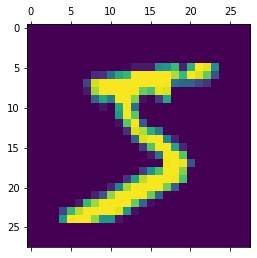

In [9]:
plt.matshow(X_train[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [10]:
prediction = classifier.predict(X_train[0:1, :])[0]
print("Benign Training Predicted Label: %i" % np.argmax(prediction))

Benign Training Predicted Label: 5


In [11]:
print(f"Adversarial training:")
evaluate(classifier, X_train_adv, y_train) #adversarial sample

Adversarial training:
y_pred: [1 4 0 6 0 1 6 6 6 0 1 1 1 7 6 1 1 6 7 6 0 4 1 6 4 1 1 1 1 1 1 6 7 1 1 1 7
 4 1 1 6 1 1 1 1 1 6 6 1 1 1 4 1 6 1 6 4 1 0 6 0 6 7 4 0 1 7 6 4 4 6 1 6 7
 1 4 1 6 6 1 1 4 0 7 1 1 1 1 4 0 7 1 6 7 6 4 1 6 1 6]
Misclassified examples:100
confusion matrix:
 [[ 0  1  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  1  0 13  0  0  0]
 [ 1  5  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  1  0  0  0]
 [ 7  1  0  0  0  0  3  0  0  0]
 [ 0  4  0  0  0  0  1  0  0  0]
 [ 0  1  0  0  0  0  0 10  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  6  0  0  0]
 [ 1  9  0  0  0  0  1  0  0  0]]
accuracy: 0.0
Precision[micro]: 0.0
Precision[macro]: 0.0
Recall[micro]: 0.0
Recall[macro]: 0.0
F1[micro]: 0.0
F1[macro]: 0.0
ROC AUC
auc[micro]: 0.4444444444444444
auc[macro]: 0.4429237160445994


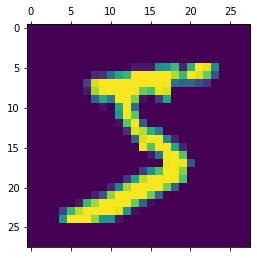

In [12]:
plt.matshow(X_train_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [13]:
prediction = classifier.predict(X_train_adv[0:1, :])[0]
print("Adversarial Training Predicted Label: %i"  % np.argmax(prediction))
#[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prediction

Adversarial Training Predicted Label: 1


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

<a id="5_2"></a>
**- 5.2. Evaluate the model on Test Set**

### print(f"Benign testing:")
evaluate(classifier, X_test, y_test) #benign sample

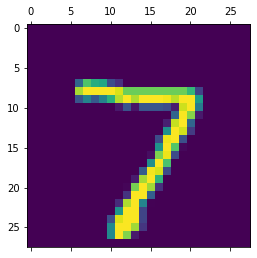

In [15]:
plt.matshow(X_test[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [16]:
prediction = classifier.predict(X_test[0:1, :])[0]
print("Benign Testing Predicted Label: %i" % np.argmax(prediction))

Benign Testing Predicted Label: 7


In [17]:
print(f"Adversarial testing:")
evaluate(classifier, X_test_adv, y_test) #adversarial sample

Adversarial testing:
y_pred: [1 1 6 4 0 6 1 1 0 1 4 0 1 4 6 1 1 1 1 1 1 1 6 6 1 4 1 0 1 6 1 1 1 0 1 1 1
 6 1 6 6 1 6 1 1 1 6 1 4 0 7 1 4 1 0 1 0 6 0 1 1 6 1 6 6 1 0 0 6 0 1 4 1 1
 6]
Misclassified examples:71
confusion matrix:
 [[ 1  2  0  0  5  0  0  0  0  0]
 [ 0  1  0  0  0  0 10  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  2  0  0  0]
 [ 6  4  0  0  1  0  1  0  0  0]
 [ 1  4  0  0  1  0  1  0  0  0]
 [ 3  1  0  0  0  0  1  1  0  0]
 [ 0  8  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0]]
accuracy: 0.05333333333333334
Precision[micro]: 0.05333333333333334
Precision[macro]: 0.03113297950759251
Recall[micro]: 0.05333333333333334
Recall[macro]: 0.04659090909090909
F1[micro]: 0.06611570247933883
F1[macro]: 0.0666072012328959
ROC AUC
auc[micro]: 0.47407407407407404
auc[macro]: 0.46906656590354273


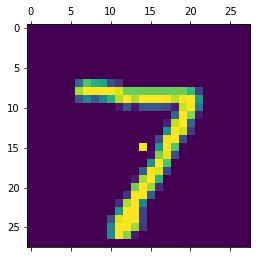

In [18]:
plt.matshow(X_test_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [19]:
prediction = classifier.predict(X_test_adv[0:1, :])[0]
print("Adversarial Training Predicted Label: %i"  % np.argmax(prediction))
#[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

Adversarial Training Predicted Label: 1
